In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Simulate 1 million transactions
n = 1_000_000
np.random.seed(42)

data = {
    "Store": np.random.choice(["Store_A", "Store_B", "Store_C"], n),
    "Year": np.random.choice([2022, 2023], n),
    "Sales": np.random.randint(100, 5000, n)
}

# Convert to Pandas first (small for simulation), then Dask
df = pd.DataFrame(data)
ddf = dd.from_pandas(df, npartitions=4)  # divide into 4 partitions


In [10]:
ddf.head()



,Store,Year,Sales
0,Store_C,2023,2285
1,Store_A,2022,2097
2,Store_C,2023,4286
3,Store_C,2022,2787
4,Store_A,2022,711


In [4]:
total_sales = ddf.groupby("Store")["Sales"].sum().compute()
print("Total sales per store:\n", total_sales)


Total sales per store:
 Store
Store_A    850457231
Store_B    848449188
Store_C    848345454
Name: Sales, dtype: int32


In [5]:
sales_by_year_store = ddf.groupby(["Year", "Store"])["Sales"].sum().compute()
print(sales_by_year_store)


Year  Store  
2022  Store_A    423961023
      Store_B    424223991
      Store_C    423078841
2023  Store_A    426496208
      Store_B    424225197
      Store_C    425266613
Name: Sales, dtype: int32


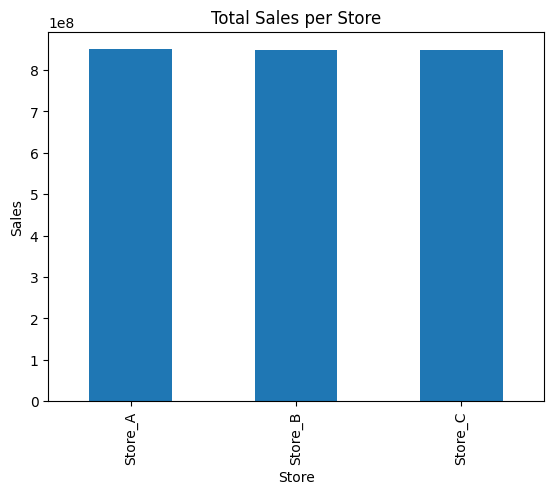

In [6]:
total_sales.plot(kind="bar", title="Total Sales per Store")
plt.ylabel("Sales")
plt.show()


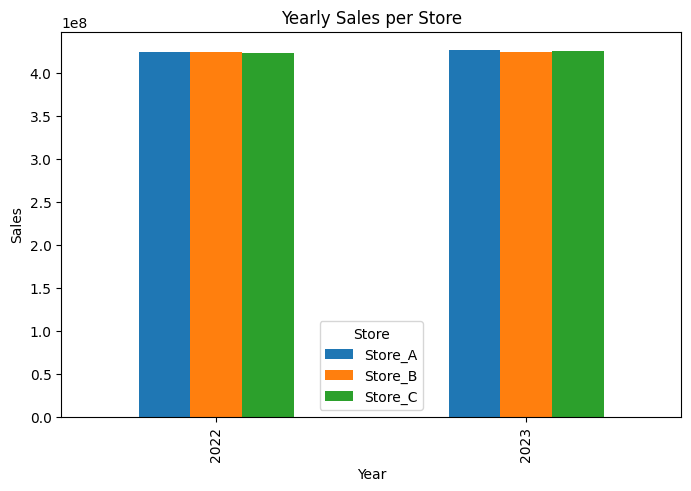

In [7]:
sales_by_year_store.unstack().plot(kind="bar", figsize=(8,5))
plt.ylabel("Sales")
plt.title("Yearly Sales per Store")
plt.show()
